In [45]:
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
HOME_WIN = 'home_win'
AWAY_WIN = 'away_win'
DRAW = 'draw'
HOME_GOALS = 'home_goals'
AWAY_GOALS = 'away_goals'

In [63]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'sport_odds_data.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
#print(df.head())  


In [64]:
## Filtering only past events

from datetime import datetime

# Convert the "commence_time" column to datetime
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Get the current date without the time component
current_date = datetime.now().date()

# Extract the date component from the "commence_time" column
df['commence_date'] = df['commence_time'].dt.date

# Filter rows where "commence_date" is greater than the current date
filtered_df = df[df['commence_date'] < current_date]

# Drop the temporary "commence_date" column if you don't need it
filtered_df = filtered_df.drop(columns=['commence_date'])

# print(filtered_df)

In [75]:
LOW_ODD_LIMIT = 1.0
UPP_ODD_LIMIT = 5.6 
ODD_STEP_SIZE = 0.2

bins_number = round((UPP_ODD_LIMIT - LOW_ODD_LIMIT) / ODD_STEP_SIZE)

print(bins_number)

23


In [60]:
# filtered_df = filtered_df.head(5)
# print(filtered_df)

In [76]:
from odds_accuracy_utils import get_match_outcome, get_bin_index, fill_h2h_bins

bins_labels = []
for i in range(0,bins_number):
    bins_labels.append(f"{round(LOW_ODD_LIMIT + i*ODD_STEP_SIZE, 1)}-{round(LOW_ODD_LIMIT + (i+1)*ODD_STEP_SIZE, 1)}")

bins = []
for i in range (0, bins_number):
    bins.append([])

## Filteirng only head-to-head results
for index, row in filtered_df.iterrows():
    match_score = get_match_outcome(row)
    home_win_odd = float(row[HOME_WIN])
    away_win_odd = float(row[AWAY_WIN])
    draw_odd = float(row[DRAW])
    home_win_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, home_win_odd)
    away_win_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, away_win_odd)
    draw_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, draw_odd)

    # bins = fill_h2h_bins(bins, match_score, home_win_bin_index, away_win_bin_index, draw_bin_index
    #                  , home_win_odd, away_win_odd, draw_odd) 
    bins = fill_h2h_bins(bins, match_score, home_win_bin_index, away_win_bin_index, draw_bin_index
                    , home_win_odd, away_win_odd, draw_odd, False) 

In [53]:
print(bins)
for i in range(0,len(bins)):
    print(f"Bin n° {i+1} contains {len(bins[i])} events" )

In [77]:
odds_accuracies = []

for bin in bins:
    cum_exp_value = 0.
    cum_real_value = 0.
    for element in bin:
        cum_exp_value += element[0]
        if element[1]:
            cum_real_value+=1
    odds_accuracies.append([cum_exp_value, cum_real_value])        

In [55]:
print(odds_accuracies)
print(bins_labels)

[[41.03278862575012, 40.0], [114.09252981814734, 111.0], [152.42270094120803, 155.0], [135.3598769877573, 124.0], [118.14553545907114, 112.0], [111.62050617183903, 104.0], [94.5224587858858, 86.0], [55.80848339335726, 55.0], [74.81288714113161, 71.0], [39.52244116037216, 30.0], [58.566577547887434, 50.0], [82.85926573426562, 75.0], [102.06722689075693, 102.0], [110.67053792923349, 115.0], [51.882591093117384, 57.0], [33.0, 35.0], [49.79489717365015, 46.0], [26.292929292929237, 17.0], [20.995423340961075, 16.0], [10.000000000000002, 6.0]]
['1.0-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4', '2.4-2.6', '2.6-2.8', '2.8-3.0', '3.0-3.2', '3.2-3.4', '3.4-3.6', '3.6-3.8', '3.8-4.0', '4.0-4.2', '4.2-4.4', '4.4-4.6', '4.6-4.8', '4.8-5.0']


In [78]:
norm_odds_accuracies = []

for element in odds_accuracies:
    if (element[0] != 0): #In case no values exists in the bean, cum_real_value will be 0
        norm_odds_accuracies.append(element[1]/element[0])
    else:
        norm_odds_accuracies.append(1)   

# print(norm_odds_accuracies)    

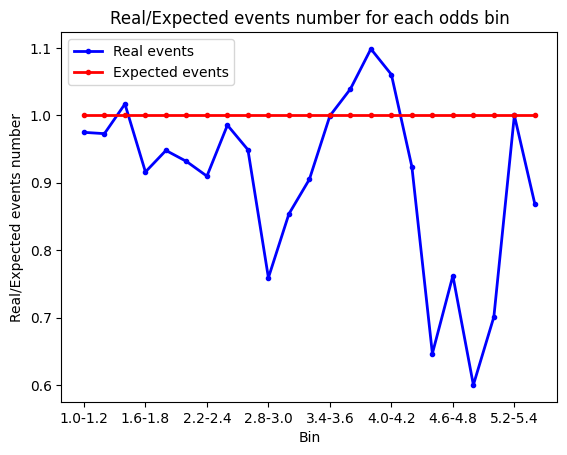

In [79]:
# Create a scatter plot with connecting lines for the first set of data
plt.plot(bins_labels, norm_odds_accuracies, color='blue', marker='.', linestyle='-', linewidth=2, label='Real events')

# Create a scatter plot with connecting lines for the second set of data
plt.plot(bins_labels, np.ones(bins_number), color='red', marker='.', linestyle='-', linewidth=2, label='Expected events')


# Adding labels and title
plt.xlabel('Bin')
plt.ylabel('Real/Expected events number')
plt.title('Real/Expected events number for each odds bin')
plt.xticks(bins_labels[::3])
plt.legend()

# Show the plot
plt.show()

In [58]:
## Calculate standard deviations
